In [84]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
actual_data = pd.read_csv('./Dataset/indo_data_valid.csv')
actual_data.head(5)

,Date,Day-th,Total_Case,Active_Case,Death,Recovered
0,Mar-02,1,2,2,0,0
1,Mar-03,2,2,2,0,0
2,Mar-04,3,2,2,0,0
3,Mar-05,4,2,2,0,0
4,Mar-06,5,4,4,0,0


In [159]:
# Total population, N.
N = 264200000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = actual_data.loc()[0]['Active_Case'], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.125, 1./14
# A grid of time points (in days)
t = np.linspace(0, 365*2, 365*2)

In [160]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [161]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [162]:
actual_daily_dict = {'Infected':[],'Recovered':[]}
actual_daily_dict['Infected'].append(actual_data.loc()[0]['Total_Case'])
actual_daily_dict['Recovered'].append(actual_data.loc()[0]['Recovered'])
for i in range(1,len(actual_data),1):
    actual_daily_dict['Infected'].append(actual_data.loc()[i]['Total_Case']-actual_data.loc()[i-1]['Total_Case'])
    actual_daily_dict['Recovered'].append(actual_data.loc()[i]['Recovered']-actual_data.loc()[i-1]['Recovered'])


In [192]:
beta=0.1434
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
difference = {'Infected':[],'Recovered':[]}
sum_infected = 0
for i in range(len(actual_daily_dict['Infected'])):
    difference['Infected'].append(int(I[i])-actual_daily_dict['Infected'][i])
    difference['Recovered'].append(int(R[i])-actual_daily_dict['Recovered'][i])
    sum_infected+=int(I[i])-actual_daily_dict['Infected'][i]
print(sum_infected)

-4


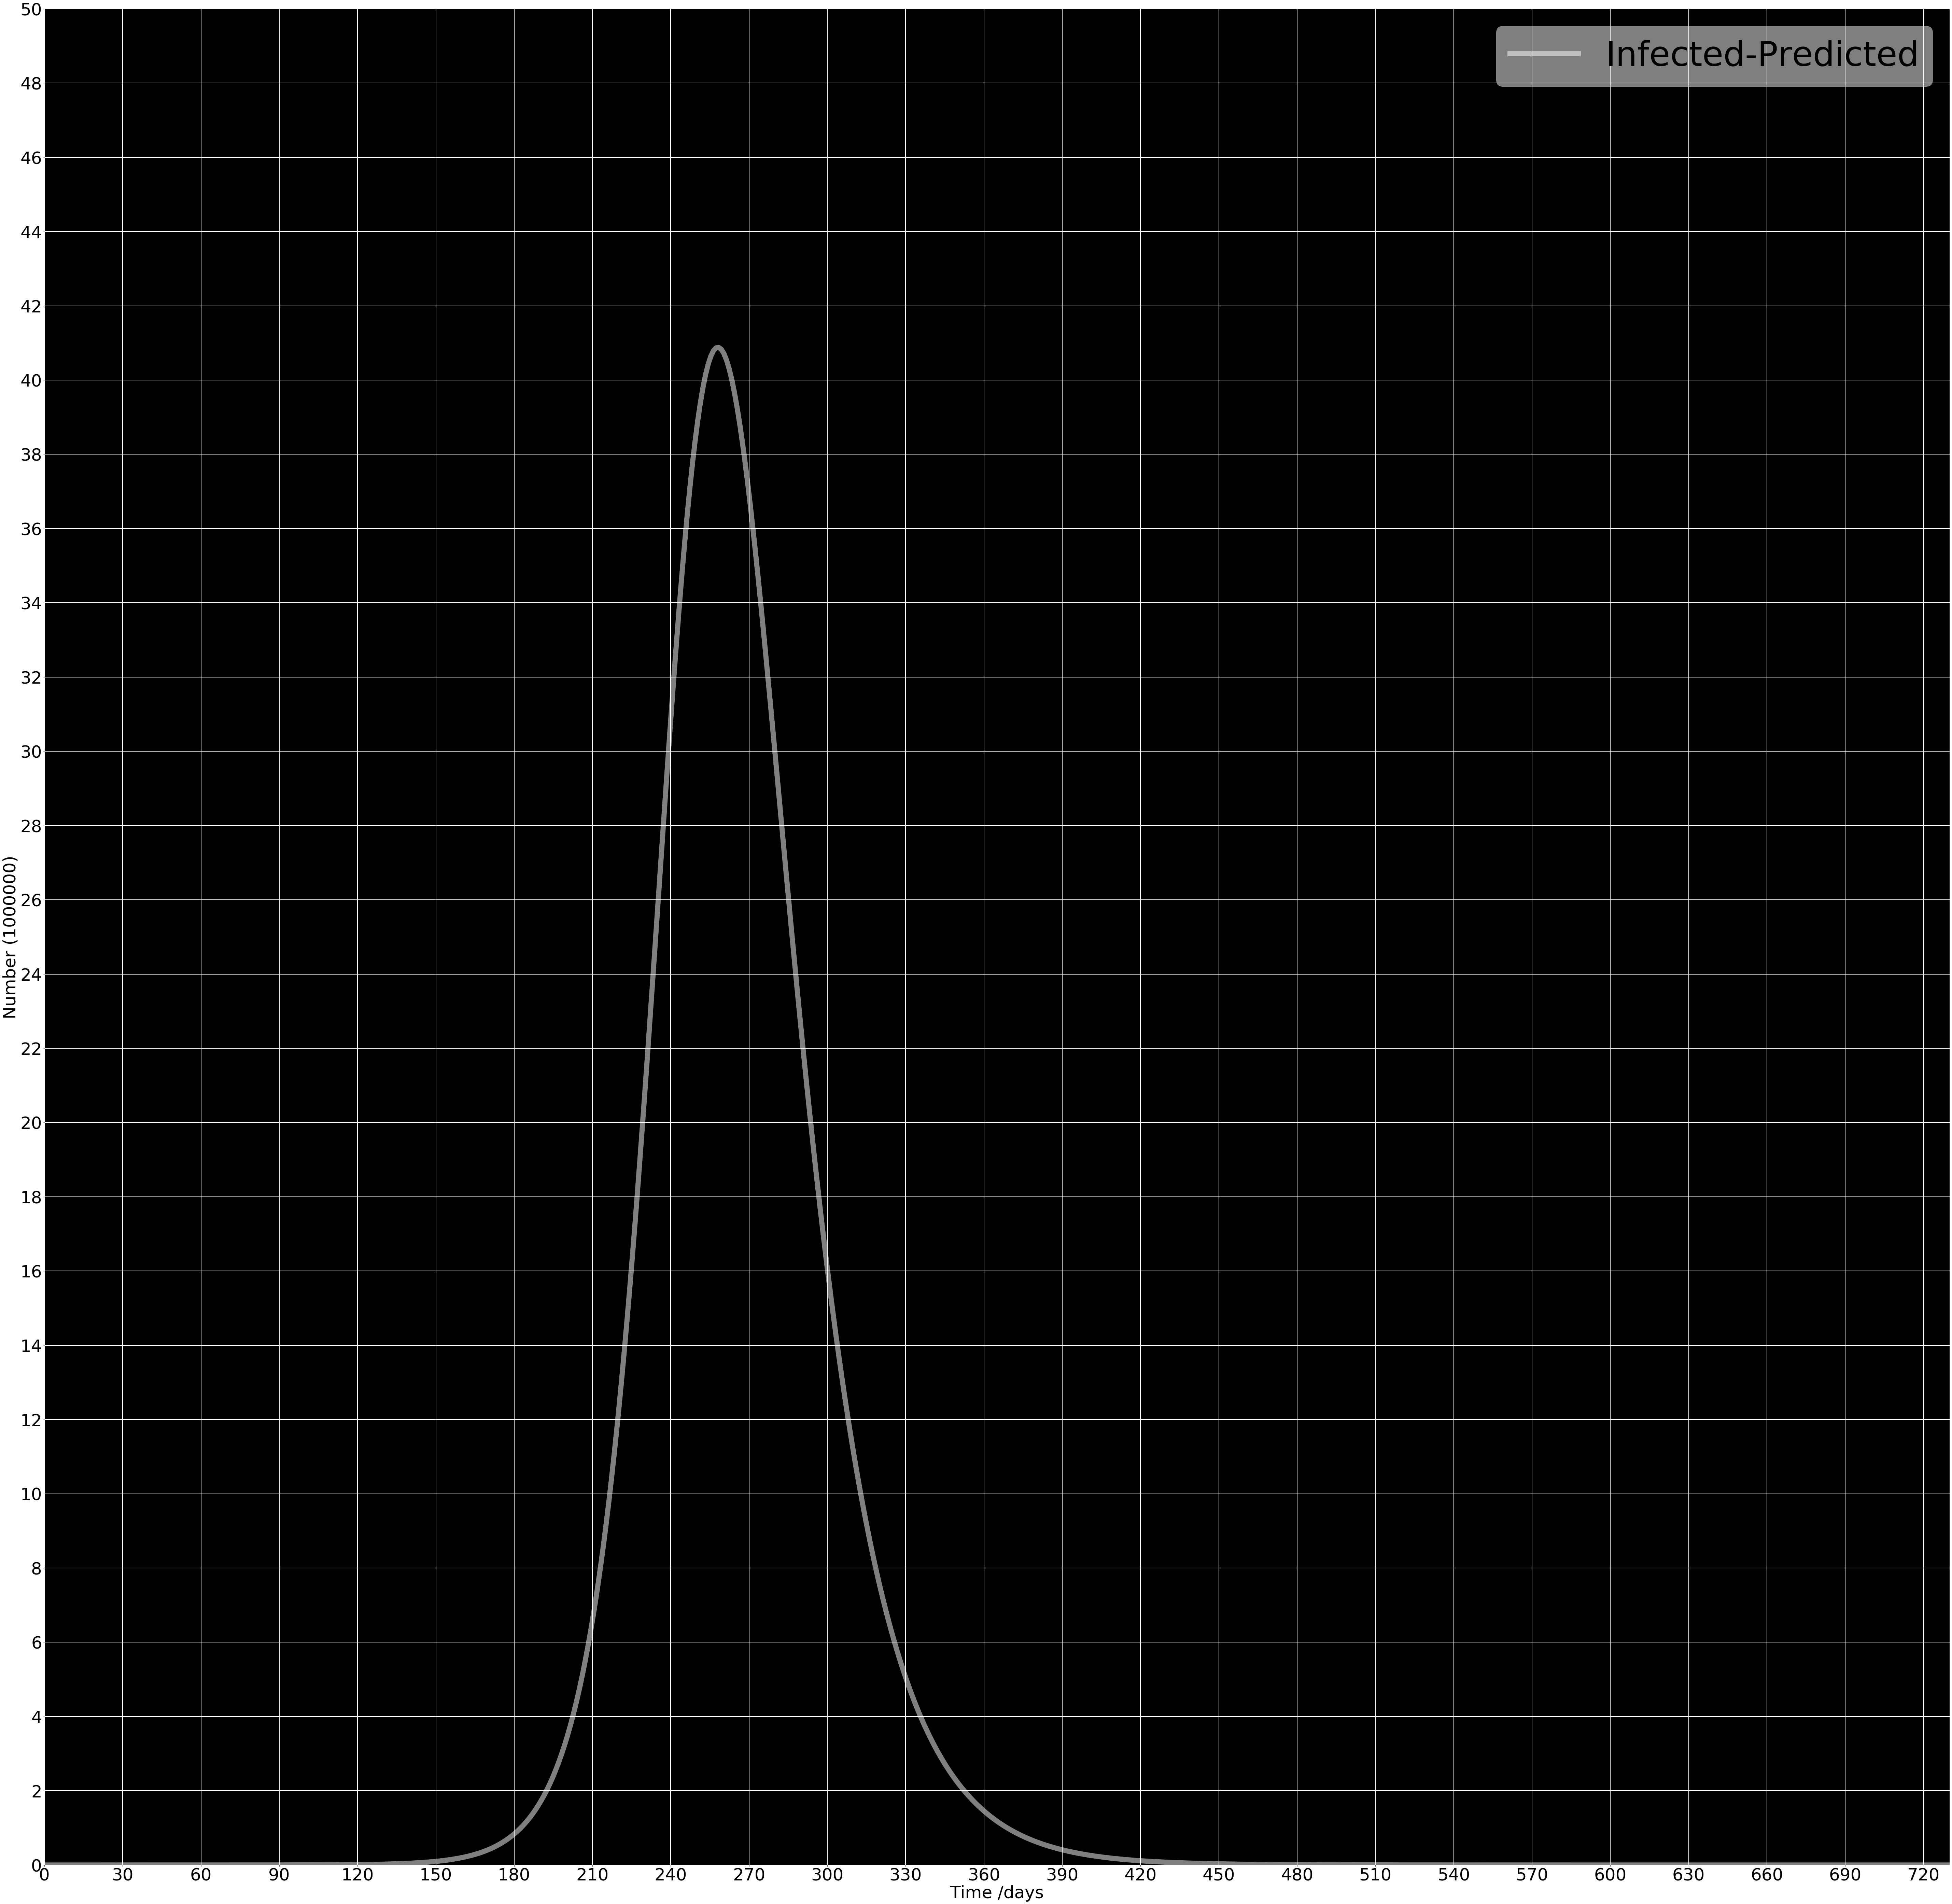

In [193]:
fig = plt.figure(facecolor='w',figsize=(100,100))
ax = fig.add_subplot(111, facecolor='#000000', axisbelow=True)
# ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000000, 'w', alpha=0.5, lw=15, label='Infected-Predicted')
# ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000000)')
ax.set_xlim(0,365*2)
ax.set_ylim(0,50)
ax.xaxis.set_major_locator(plt.MultipleLocator(30))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.rcParams.update({'font.size': 50})
plt.show()